In [1]:
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl
import cv2
import json
from ipywidgets import interact
from pycocotools.coco import COCO

In [2]:
label_list = glob.glob('../dataset/label/*')

In [3]:
# json 아닌 label
sum([x.split('.')[-1] != 'json' for x in label_list])

0

In [4]:
print('label 개수 :', len(label_list))

label 개수 : 371


In [5]:
def js_to_img(data_path):
    data_path = data_path.replace('label' , 'defect').replace('json' , 'jpg')
    return data_path

def dict_value_to_int(anno):
    anno = {k: int(v) for k , v in anno.items()}
    x ,y , w, h = anno['x'] , anno['y'] , anno['width'] , anno['height']
    x1 , y1 = x - (w // 2) , y - (h //2)
    x2 , y2 =  x + (w // 2) , y + (h //2)

    return x1 ,y1 , x2 , y2


def yolo_to_cv2_format(anno):
    x_c ,y_c , w, h = anno
    x1 , y1 = x_c - (w // 2) , y_c - (h //2)
    x2 , y2 =  x_c + (w // 2) , y_c + (h //2)

    return x1 ,y1 , x2 , y2

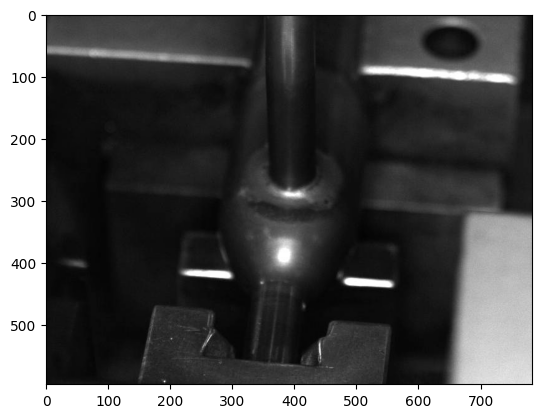

In [6]:
mpl.rcParams.update({"axes.grid" : False, "grid.color": "black"})
img_path = js_to_img(label_list[0])
img = cv2.imread(img_path )
plt.imshow(img)
plt.show()

In [7]:
img.shape

(596, 784, 3)

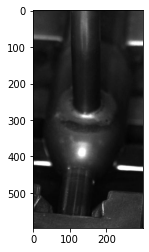

In [11]:
plt.imshow(img[:,250:550,:])

In [12]:
# json file로 부터 img 시각화 하는 방식
def f(idx):
    with open(label_list[idx] , 'r') as file:
        json_file = json.load(file)
    obj_list = json_file[0]['annotations']
    img_path = js_to_img(label_list[idx])
    img = cv2.imread(img_path )
    for obj in obj_list:
        anno = obj['coordinates']
        label_str = obj['label']
        anno = dict_value_to_int(anno)        
        font=cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, label_str, (anno[0], anno[1] -5), font, 0.8, (0, 255, 0), 2)
        img = cv2.rectangle(img , (anno[0] , anno[1]) , ( anno[2]  , anno[3]), color = (0,255, 0) , thickness = 1)
    plt.figure(figsize = (15,15))
    plt.imshow(img)
    plt.show()


interact(f , idx=(0 , len(label_list)-1))

interactive(children=(IntSlider(value=185, description='idx', max=370), Output()), _dom_classes=('widget-inter…

<function __main__.f(idx)>

In [17]:
coco = COCO('../info/coco.json')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [18]:
category_name_list = coco.loadCats(coco.getCatIds())

In [19]:
category_name_list

[{'id': 1, 'name': 'over', 'supercategory': 'defect'},
 {'id': 2, 'name': 'under', 'supercategory': 'defect'},
 {'id': 3, 'name': 'non-welding', 'supercategory': 'defect'}]

In [24]:
# coco format으로 부터 img load 하는 방식
def coco_img(idx):
    img = cv2.imread('../dataset/' + coco.loadImgs(idx)[0]['file_name'])
    annIds = coco.getAnnIds(imgIds=idx, iscrowd=None)
    anns = coco.loadAnns(annIds)
    for obj in anns:
        anno = obj['bbox']
        label_str = coco.loadCats(obj['category_id'])[0]['name']
        anno = yolo_to_cv2_format(anno)        
        font=cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, label_str, (anno[0], anno[1] -5), font, 0.8, (0, 255, 0), 2)
        img = cv2.rectangle(img , (anno[0] , anno[1]) , ( anno[2]  , anno[3]), color = (0,255, 0) , thickness = 1)
    plt.figure(figsize = (15,15))
    plt.imshow(img)
    plt.show()

In [25]:
interact(coco_img , idx=(0 , len(coco.getImgIds())-1))

interactive(children=(IntSlider(value=1162, description='idx', max=2324), Output()), _dom_classes=('widget-int…

<function __main__.coco_img(idx)>